
# NLP on UCI Spam/ Ham data using Naive Bayes Classifier 

NLP links natural laguage to machine language 

bag of words = a doccument representing a vector of words

E.g = red car and blue car can be respresented as (1,0,1) & (0,1,1) where each position
stands for red , blue and car respectively 

cosine similarity can be used on these vectors to determine similarity with each other 

Corpus = Group of all such doccuments 

TF-IDF = term frequency inverse frequency  

Term Frequency                = importance of the term within that doccument

TF(d,t)                       = number of occurances of term t in doccument d 

Inverse Document Frequency   = importance of term in the corpus 

IDF(t)                        = log(D/t) where 

D                             = total number of documents 

t                             = total number of documents including the term 

In [32]:
# mathematical expression
# W (of x,y) = tf (of x,y) X log(N/(df of x))
# where 
#  tf (of x,y) = freq of x in y 
#  df of x     = number of documents containing x 
#        N     = Total number of documents 

# this methodology basically gives us a measure of the word count plus its importance in entire corpus

In [33]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [34]:
# this will call the nltk downloader. 
# entering l will show the list of available packages 
# eneter d to download and enetter name of package next
# we will work with the stopwords package
# nltk.download_shell()

In [37]:
texts= [line.rstrip() for line in open('/Users/aparajit/Desktop/PROJECTS/Python/Python for Data Science and Machine Learning /Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/Natural-Language-Processing/smsspamcollection/SMSSpamCollection')] 

In [38]:
texts[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
len(texts)

5574

 basically we have 5574 text messages (corpus)
    
 enumerate function used to assign counters to items within a list 

 returns tuple , if we specify a number then the counter can start from that number 
    
 default counter starts at zero

In [41]:
type(texts)

list

In [42]:
for count,item in enumerate(texts[:10]):
    print(count,item)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

now rhat we are sure of the file structure we can use pandas to import the file as a df 

In [43]:
texts=pd.read_csv('/Users/aparajit/Desktop/PROJECTS/Python/Python for Data Science and Machine Learning /Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/Natural-Language-Processing/smsspamcollection/SMSSpamCollection',sep='\t',names=['Label','Msg'])

In [44]:
texts.head(3)

,Label,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [45]:
texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Label    5572 non-null object
Msg      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [46]:
texts.describe()

,Label,Msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [47]:
texts.groupby('Label').describe()

Msg                                                               
      count unique                                                top freq
Label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [48]:
# detetcting the length of each message
texts['length']=texts['Msg'].apply(len)

In [49]:
texts.head()

,Label,Msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


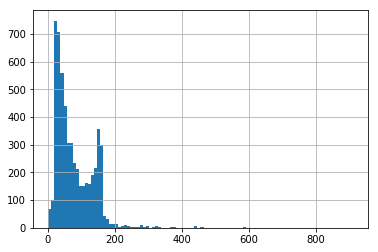

In [50]:
texts['length'].hist(bins=100)

In [51]:
texts['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [52]:
# checking the text with max length 
texts[texts['length']==910]['Msg'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bc3e550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1b798c50>], dtype=object)

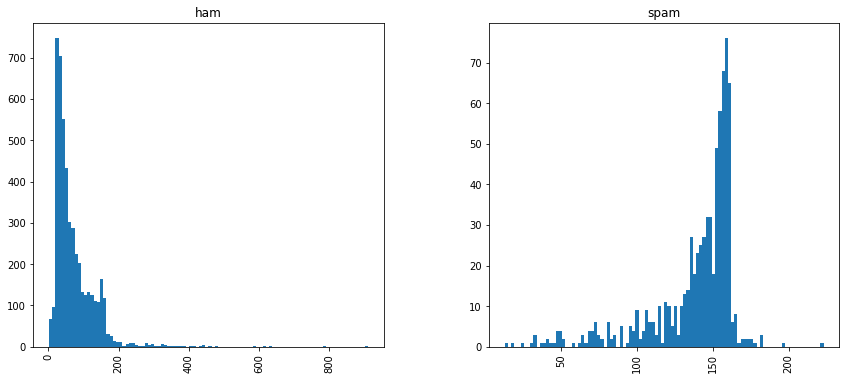

In [53]:
# plotting text length by label 
texts.hist(column='length',by='Label',bins=100,figsize=(14,6))

we can conclude that spam messages have longer text length 

# Preprocessing

In [55]:
import string

In [56]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
# punctuation removal example 
dummy= 'Sample : Gibberish!!, email@ to the why'

In [58]:
dummy_punc= [x for x in dummy if x not in string.punctuation]

In [59]:
dummy_punc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'G',
 'i',
 'b',
 'b',
 'e',
 'r',
 'i',
 's',
 'h',
 ' ',
 'e',
 'm',
 'a',
 'i',
 'l',
 ' ',
 't',
 'o',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'w',
 'h',
 'y']

In [60]:
# joining all the words by spaces to put in original format
dummy_punc=''.join(dummy_punc)

In [61]:
dummy_punc

'Sample  Gibberish email to the why'

In [62]:
dummy_punc.split()

['Sample', 'Gibberish', 'email', 'to', 'the', 'why']

stopwords are english language words like an,a,the and other words that have no value in our analysis 

we will remove these as well 

In [64]:
from nltk.corpus import stopwords

In [65]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [66]:
# removing stopwords from the example 
dummy_clean=[word for word in dummy_punc.split() if word.lower() not in stopwords.words('english') ]

In [67]:

dummy_clean



['Sample', 'Gibberish', 'email']

In [68]:
# creating a function to perform these two operations to our entire dataframe 
def data_clean(Msg):
    """
    1. removing all punctuation
    2. removing all stopwords
    3. return list of clean text words
    """
    no_punc=[word for word in Msg if word not in string.punctuation]
    no_punc=''.join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]    

In [69]:
texts.head()

,Label,Msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [70]:
texts['Msg'].head(10).apply(data_clean)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: Msg, dtype: object

# Vectorization 

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
bow_transformer= CountVectorizer(analyzer=data_clean).fit(texts['Msg'])

In [76]:
len(bow_transformer.vocabulary_)

11425

In [78]:
messages_bow=bow_transformer.transform(texts['Msg'])

In [79]:
messages_bow.shape

(5572, 11425)

In [80]:
# non- zero occurances 
messages_bow.nnz

50548

In [81]:
# now that we have vectorized the entire data let us calculate TF-IDF

# TF-IDF

Example:
Consider a document containing 100 words wherein the word cat appears 3 times.
The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [82]:
from sklearn.feature_extraction.text import TfidfTransformer

In [83]:
tfidf_transformer= TfidfTransformer().fit(messages_bow)

In [84]:
# the above step will calculate the TF-IDF values for each word 

In [93]:
# checking value for word 'fuck'
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['fuck']])

6.85310006533


In [94]:
# transforming entire bag of words corpus into tf-idf corpus 
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [95]:
messages_tfidf.shape

(5572, 11425)

# Train test Split

In [110]:
from sklearn.model_selection import train_test_split

In [122]:
msg_train, msg_test, label_train, label_test = \
train_test_split(texts['Msg'], texts['Label'], test_size=0.2,random_state=101)

In [123]:
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [124]:
# We will use naive bayes classifier to classify our dataset into spam and ham 
from sklearn.naive_bayes import MultinomialNB

In [126]:
from sklearn.pipeline import Pipeline

In [127]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=data_clean)),
    ('tfidf',TfidfTransformer()),
    ('model',MultinomialNB())
])

# Model Fitting 

In [128]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function data_clean at 0x1a1c0a3ae8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...ear_tf=False, use_idf=True)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [129]:
predict= pipeline.predict(msg_test)

# Model Evaluation

In [130]:
from sklearn.metrics import classification_report,confusion_matrix

In [134]:
print(classification_report(predict,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1026
       spam       0.66      1.00      0.79        89

avg / total       0.97      0.96      0.96      1115



In [135]:
print(confusion_matrix(predict,label_test))

[[980  46]
 [  0  89]]


END !!